In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import zscore

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import plotly.express as px

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

/Users/silver-moon/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Adjust display and formatting settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [30, 15]
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

In [3]:
df = pd.read_excel('Credit Card Customer Data.xlsx')

In [4]:
df.head(10)

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   
5      6         58634             20000                   3   
6      7         48370            100000                   5   
7      8         37376             15000                   3   
8      9         82490              5000                   2   
9     10         44770              3000                   4   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  
5                  0                    1                 8  
6                  0                   11                 2  
7                  0                    1                 1  
8                  0                    2                 2  
9                  0                    1                 7

In [5]:
df.shape

(660, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
df.describe().T

count       mean        std        min        25%  \
Sl_No               660.000    330.500    190.670      1.000    165.750   
Customer Key        660.000 55,141.444 25,627.772 11,265.000 33,825.250   
Avg_Credit_Limit    660.000 34,574.242 37,625.488  3,000.000 10,000.000   
Total_Credit_Cards  660.000      4.706      2.168      1.000      3.000   
Total_visits_bank   660.000      2.403      1.632      0.000      1.000   
Total_visits_online 660.000      2.606      2.936      0.000      1.000   
Total_calls_made    660.000      3.583      2.865      0.000      1.000   

                           50%        75%         max  
Sl_No                  330.500    495.250     660.000  
Customer Key        53,874.500 77,202.500  99,843.000  
Avg_Credit_Limit    18,000.000 48,000.000 200,000.000  
Total_Credit_Cards       5.000      6.000      10.000  
Total_visits_bank        2.000      4.000       5.000  
Total_visits_online      2.000      4.000      15.000  
Total_calls_made         3.000      5.000      10.000

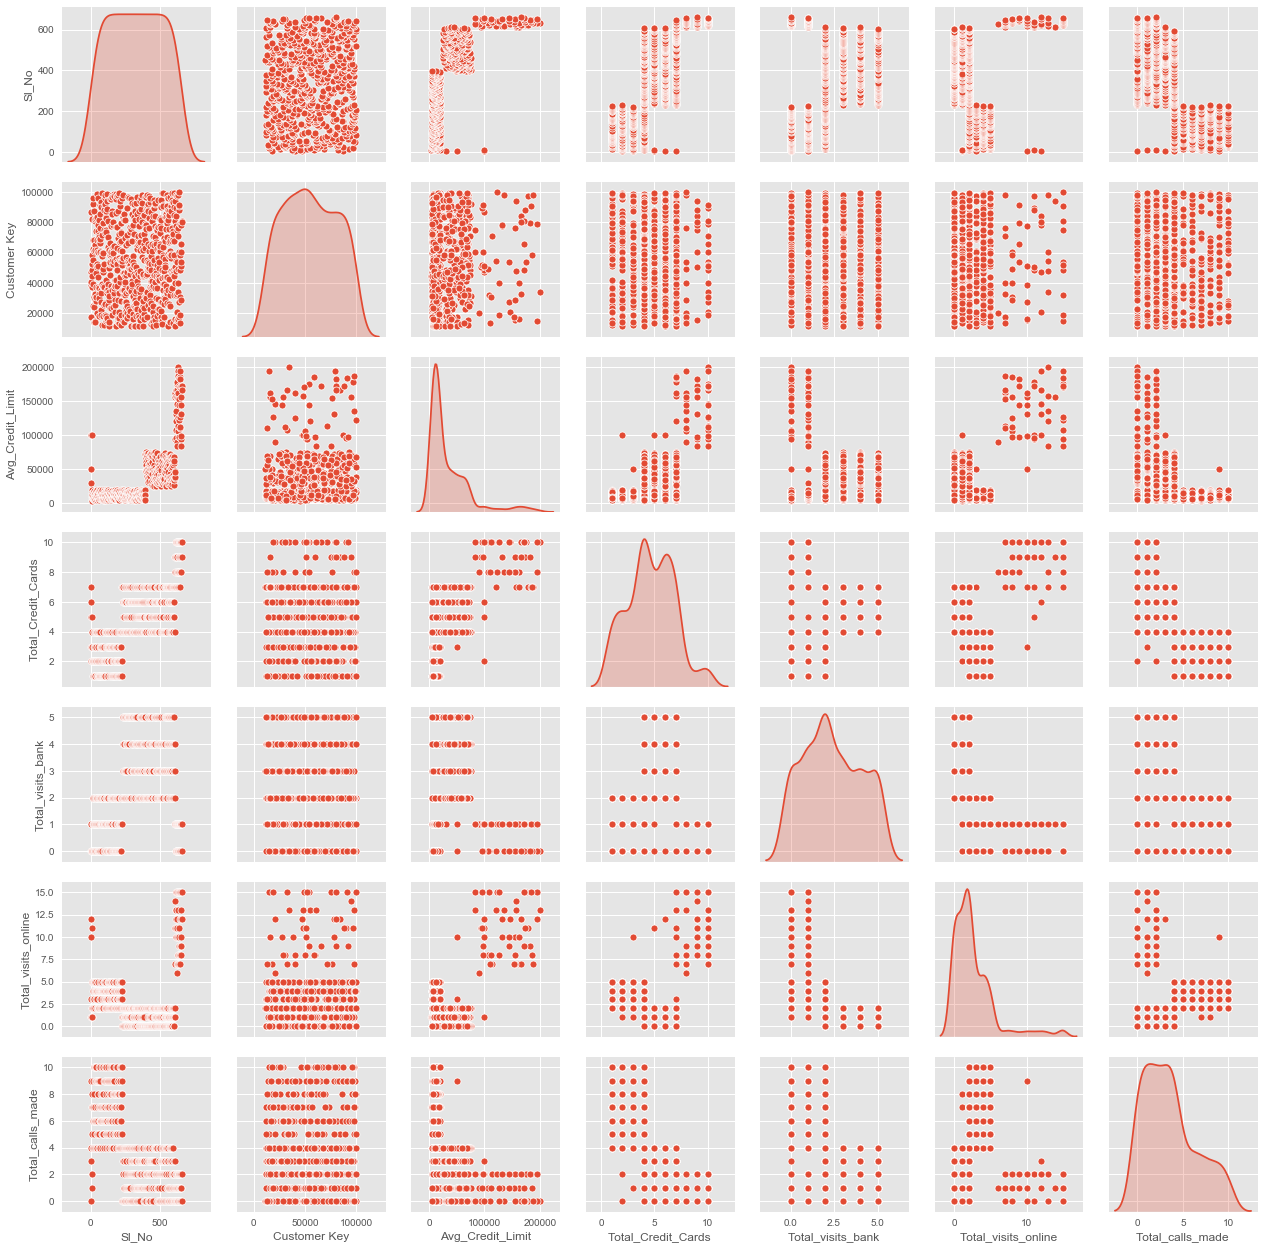

In [8]:
sns.pairplot(df, diag_kind = 'kde')

In [9]:
df_Attr=df.iloc[:,2:]
df_Attr.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made  
0                    1                 0  
1                   10                 9  
2                    3                 4  
3                    1                 4  
4                   12                 3

In [10]:
df_Attr_Scaled = df_Attr.apply(zscore)
df_Attr_Scaled.head(10)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0             1.740              -1.249             -0.860   
1             0.410              -0.788             -1.474   
2             0.410               1.059             -0.860   
3            -0.122               0.136             -0.860   
4             1.740               0.597             -1.474   
5            -0.388              -0.788             -1.474   
6             1.740               0.136             -1.474   
7            -0.521              -0.788             -1.474   
8            -0.787              -1.249             -1.474   
9            -0.840              -0.326             -1.474   

   Total_visits_online  Total_calls_made  
0               -0.547            -1.252  
1                2.521             1.892  
2                0.134             0.146  
3               -0.547             0.146  
4                3.202            -0.204  
5               -0.547             1.543  
6                2.861            -0.553  
7               -0.547            -0.902  
8               -0.207            -0.553  
9               -0.547             1.193

In [11]:
df_Attr_Scaled.describe().T

count   mean   std    min    25%    50%   75%   max
Avg_Credit_Limit    660.000  0.000 1.001 -0.840 -0.654 -0.441 0.357 4.400
Total_Credit_Cards  660.000 -0.000 1.001 -1.711 -0.788  0.136 0.597 2.444
Total_visits_bank   660.000  0.000 1.001 -1.474 -0.860 -0.247 0.979 1.593
Total_visits_online 660.000  0.000 1.001 -0.888 -0.547 -0.207 0.475 4.225
Total_calls_made    660.000 -0.000 1.001 -1.252 -0.902 -0.204 0.495 2.241

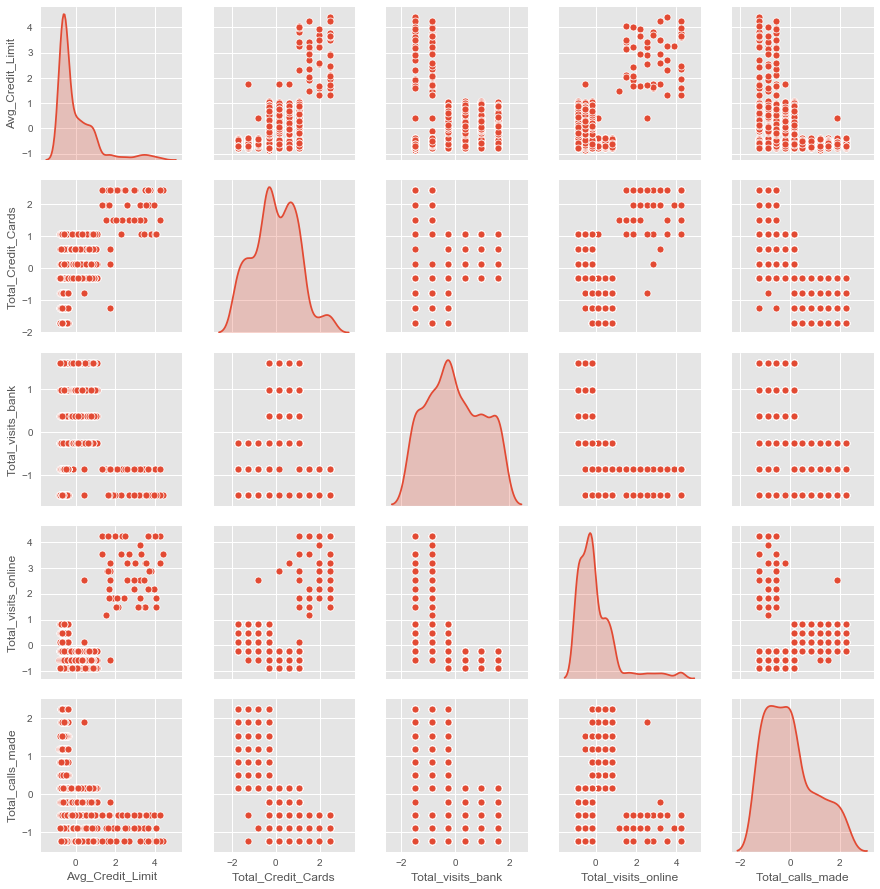

In [12]:
sns.pairplot(df_Attr_Scaled, diag_kind = 'kde')

# With Univariate analysis we can see there are 3 to 4 distinct clusters

In [13]:
df_Attr_Scaled.corr()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Avg_Credit_Limit                1.000               0.609             -0.100   
Total_Credit_Cards              0.609               1.000              0.316   
Total_visits_bank              -0.100               0.316              1.000   
Total_visits_online             0.551               0.168             -0.552   
Total_calls_made               -0.414              -0.651             -0.506   

                     Total_visits_online  Total_calls_made  
Avg_Credit_Limit                   0.551            -0.414  
Total_Credit_Cards                 0.168            -0.651  
Total_visits_bank                 -0.552            -0.506  
Total_visits_online                1.000             0.127  
Total_calls_made                   0.127             1.000

In [14]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [15]:
model.fit(df_Attr_Scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [16]:
df_Attr_Scaled['labels']=model.labels_
df_Attr_Scaled.head(10)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0             1.740              -1.249             -0.860   
1             0.410              -0.788             -1.474   
2             0.410               1.059             -0.860   
3            -0.122               0.136             -0.860   
4             1.740               0.597             -1.474   
5            -0.388              -0.788             -1.474   
6             1.740               0.136             -1.474   
7            -0.521              -0.788             -1.474   
8            -0.787              -1.249             -1.474   
9            -0.840              -0.326             -1.474   

   Total_visits_online  Total_calls_made  labels  
0               -0.547            -1.252       0  
1                2.521             1.892       2  
2                0.134             0.146       0  
3               -0.547             0.146       0  
4                3.202            -0.204       1  
5               -0.547             1.543       2  
6                2.861            -0.553       1  
7               -0.547            -0.902       2  
8               -0.207            -0.553       2  
9               -0.547             1.193       2

In [17]:
df_Attr_Scaled.groupby(["labels"]).count()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0                    387                 387                387   
1                     50                  50                 50   
2                    223                 223                223   

        Total_visits_online  Total_calls_made  
labels                                         
0                       387               387  
1                        50                50  
2                       223               223

In [18]:
df_Cluster = df_Attr_Scaled.groupby(["labels"])

In [19]:
df_Cluster.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0                 -0.023               0.372              0.664   
1                  2.832               1.862             -1.106   
2                 -0.595              -1.063             -0.904   

        Total_visits_online  Total_calls_made  
labels                                         
0                    -0.553            -0.551  
1                     2.827            -0.874  
2                     0.325             1.153

In [20]:
Z = linkage(df_Attr_Scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_Attr_Scaled))

c

0.9252387749820263

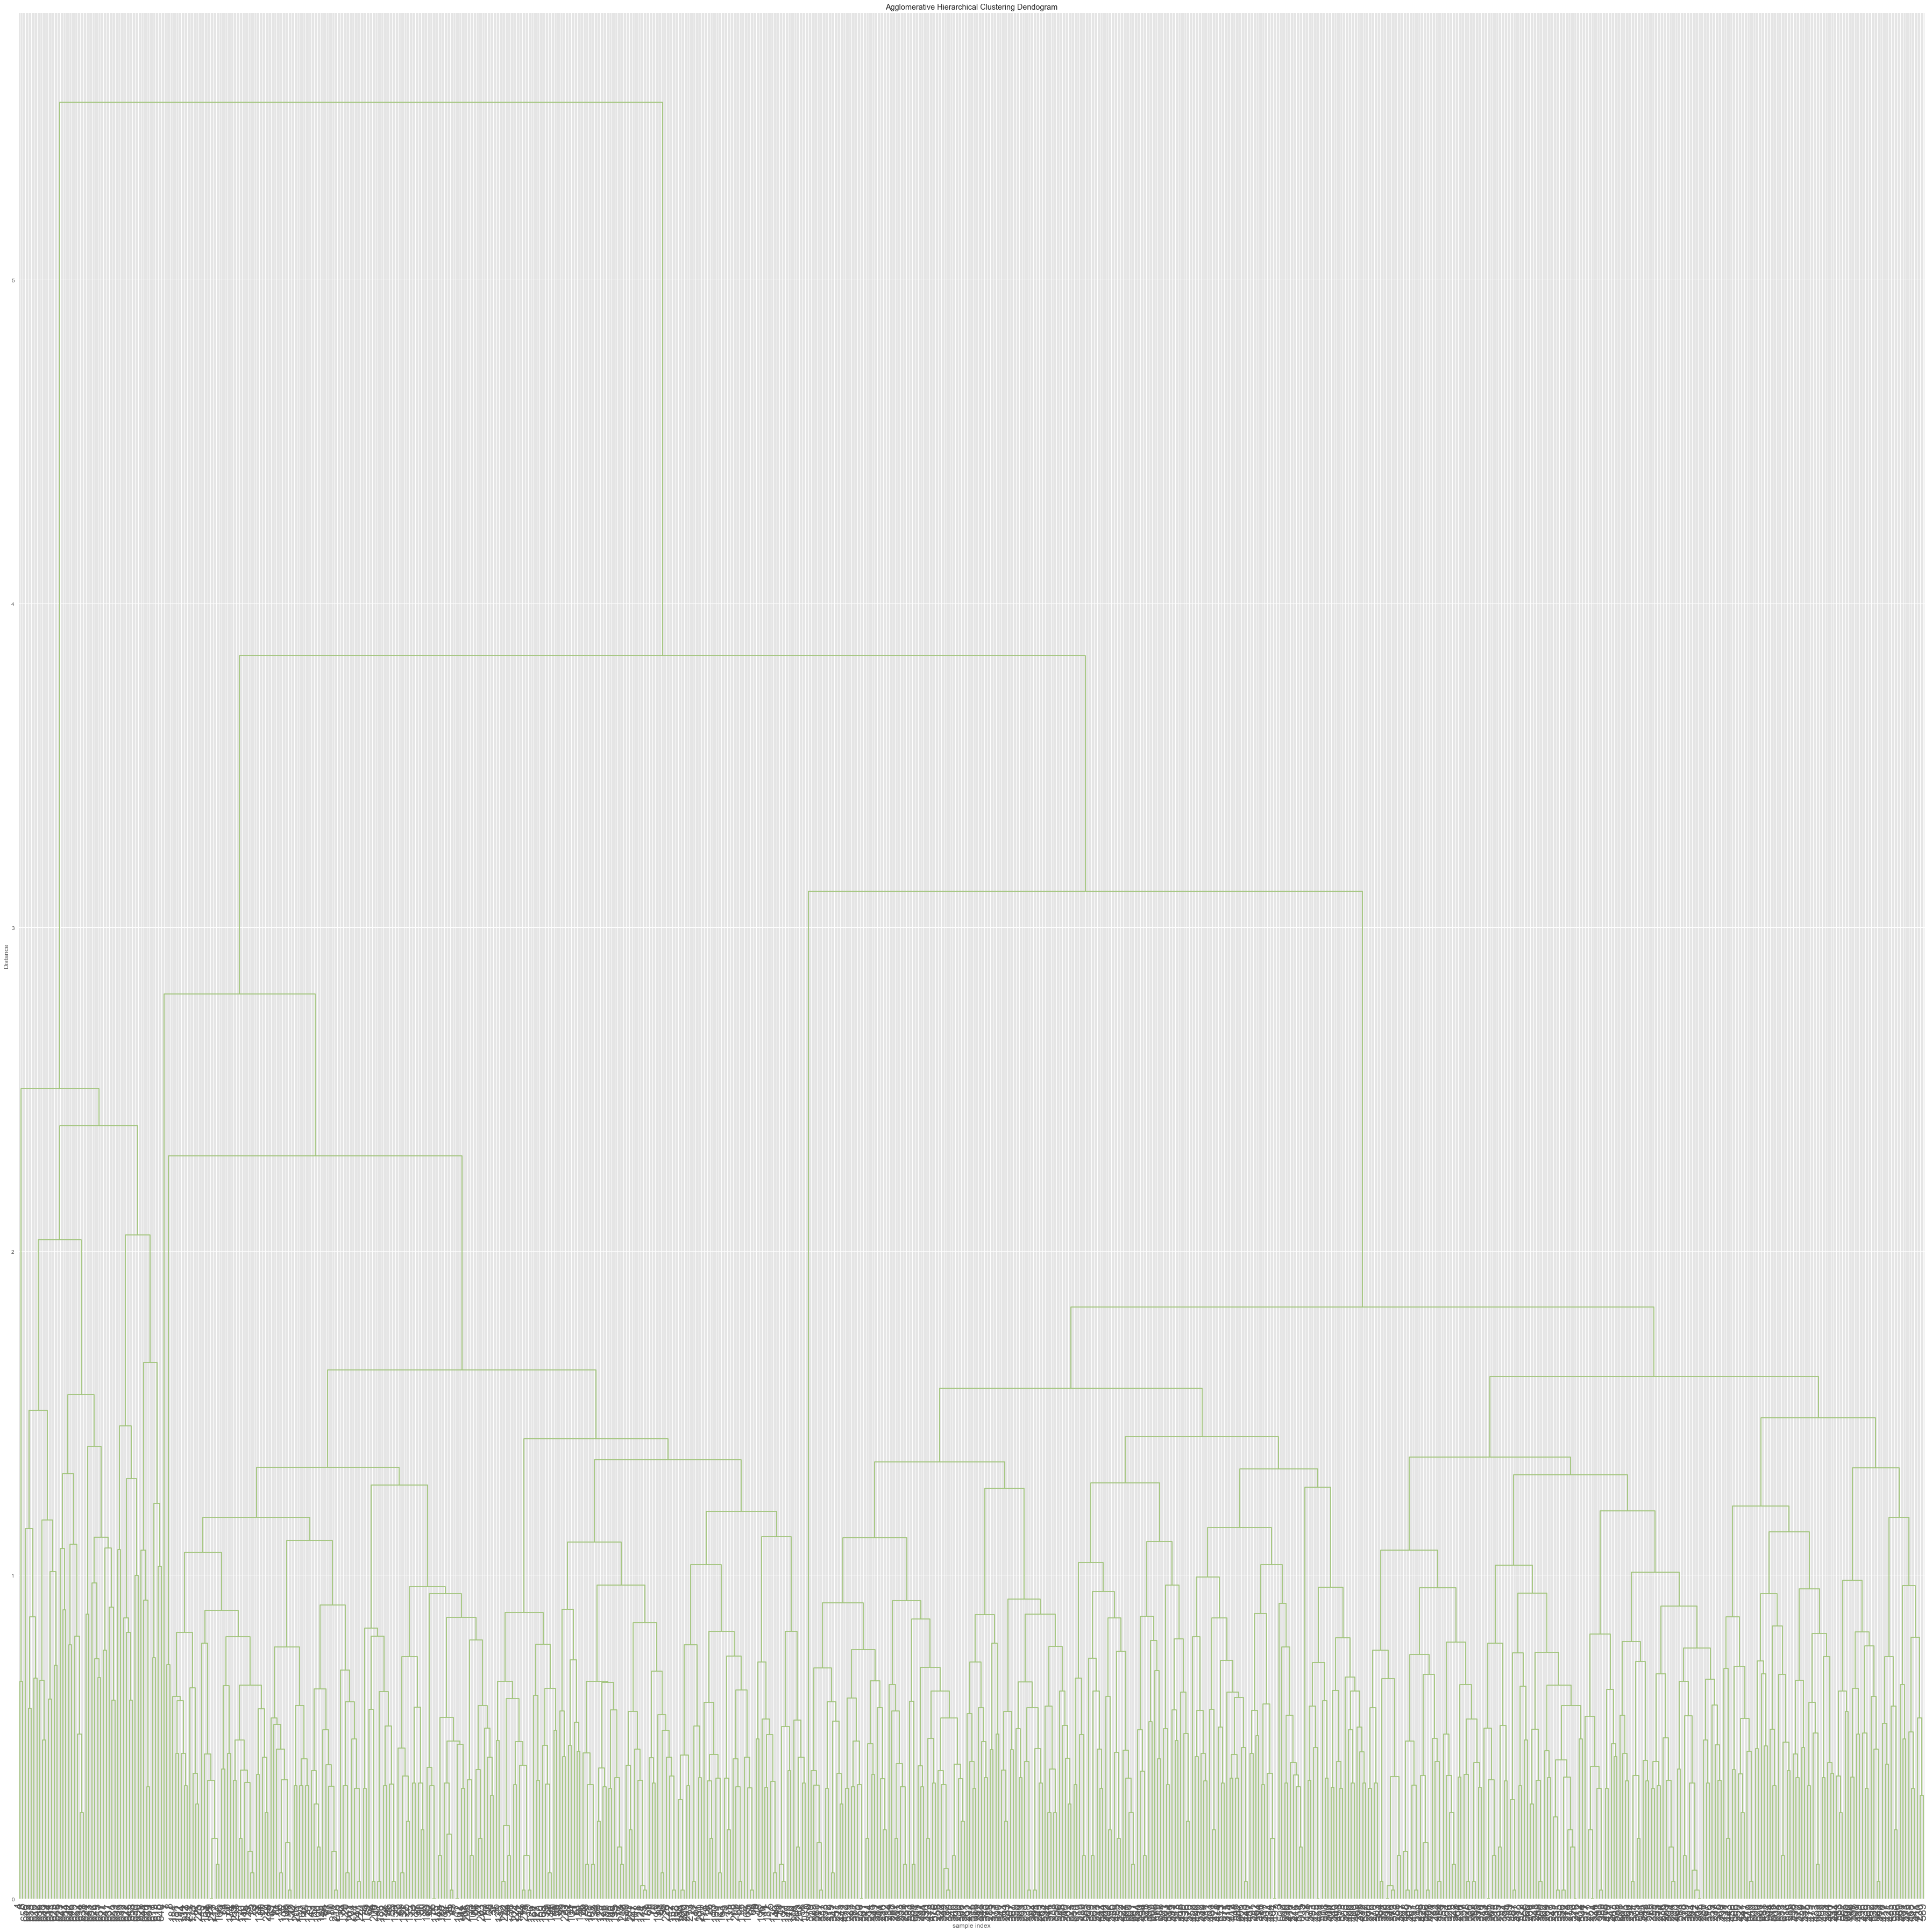

In [21]:
plt.figure(figsize=(50, 50))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=20. )
plt.tight_layout()

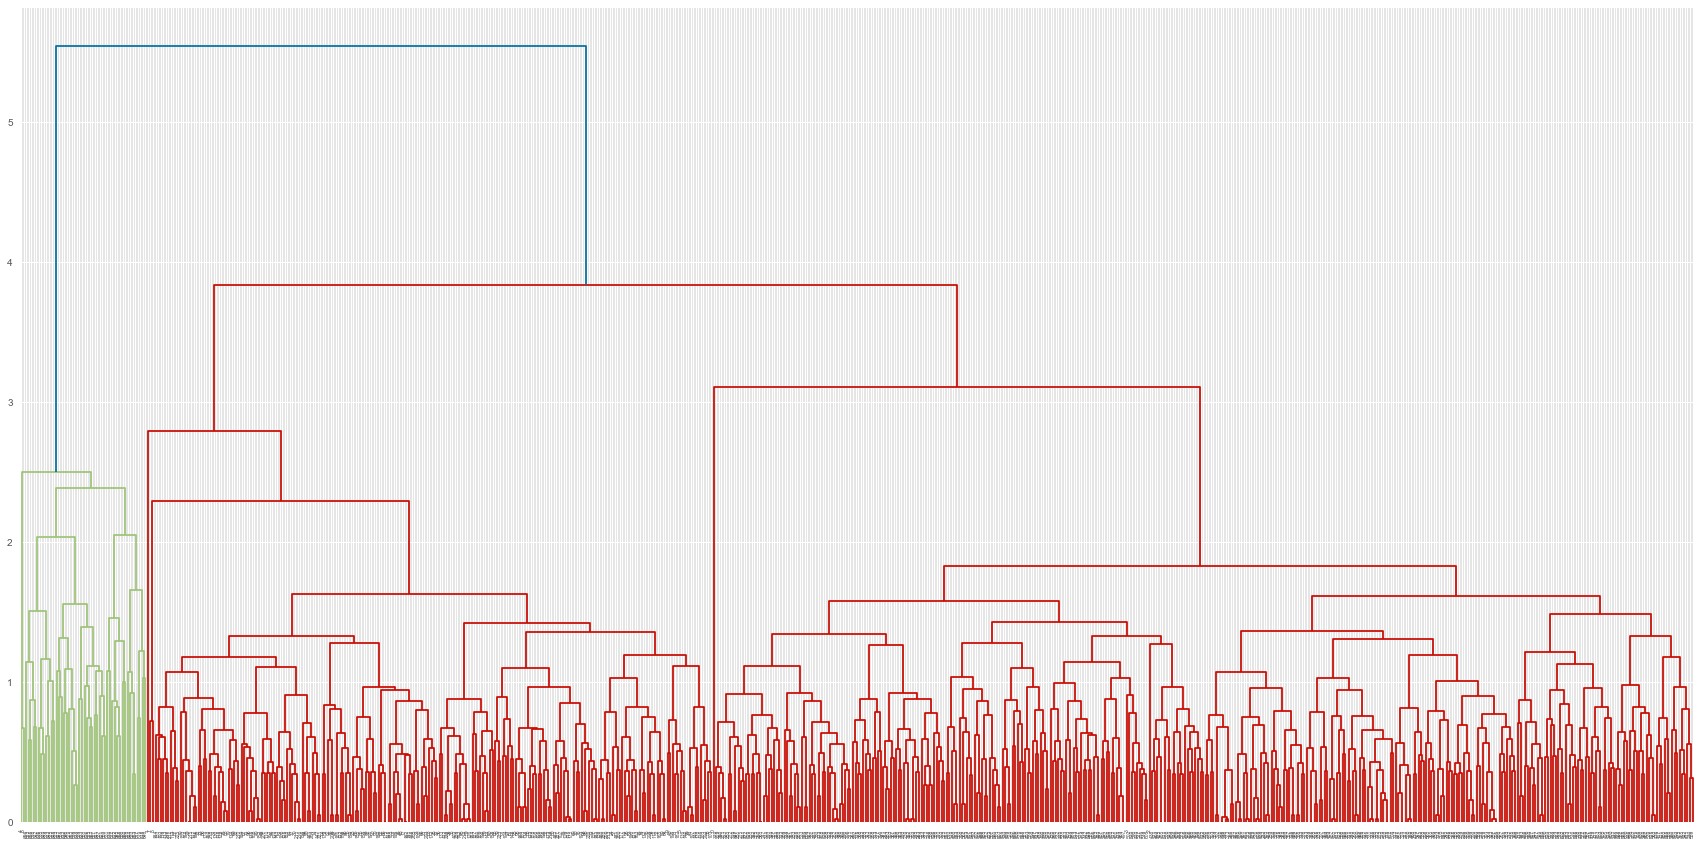

In [22]:
dend = shc.dendrogram(shc.linkage(df_Attr_Scaled, method='average'))

In [23]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df_Attr_Scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df_Attr_Scaled))

c

0.8170227112271451

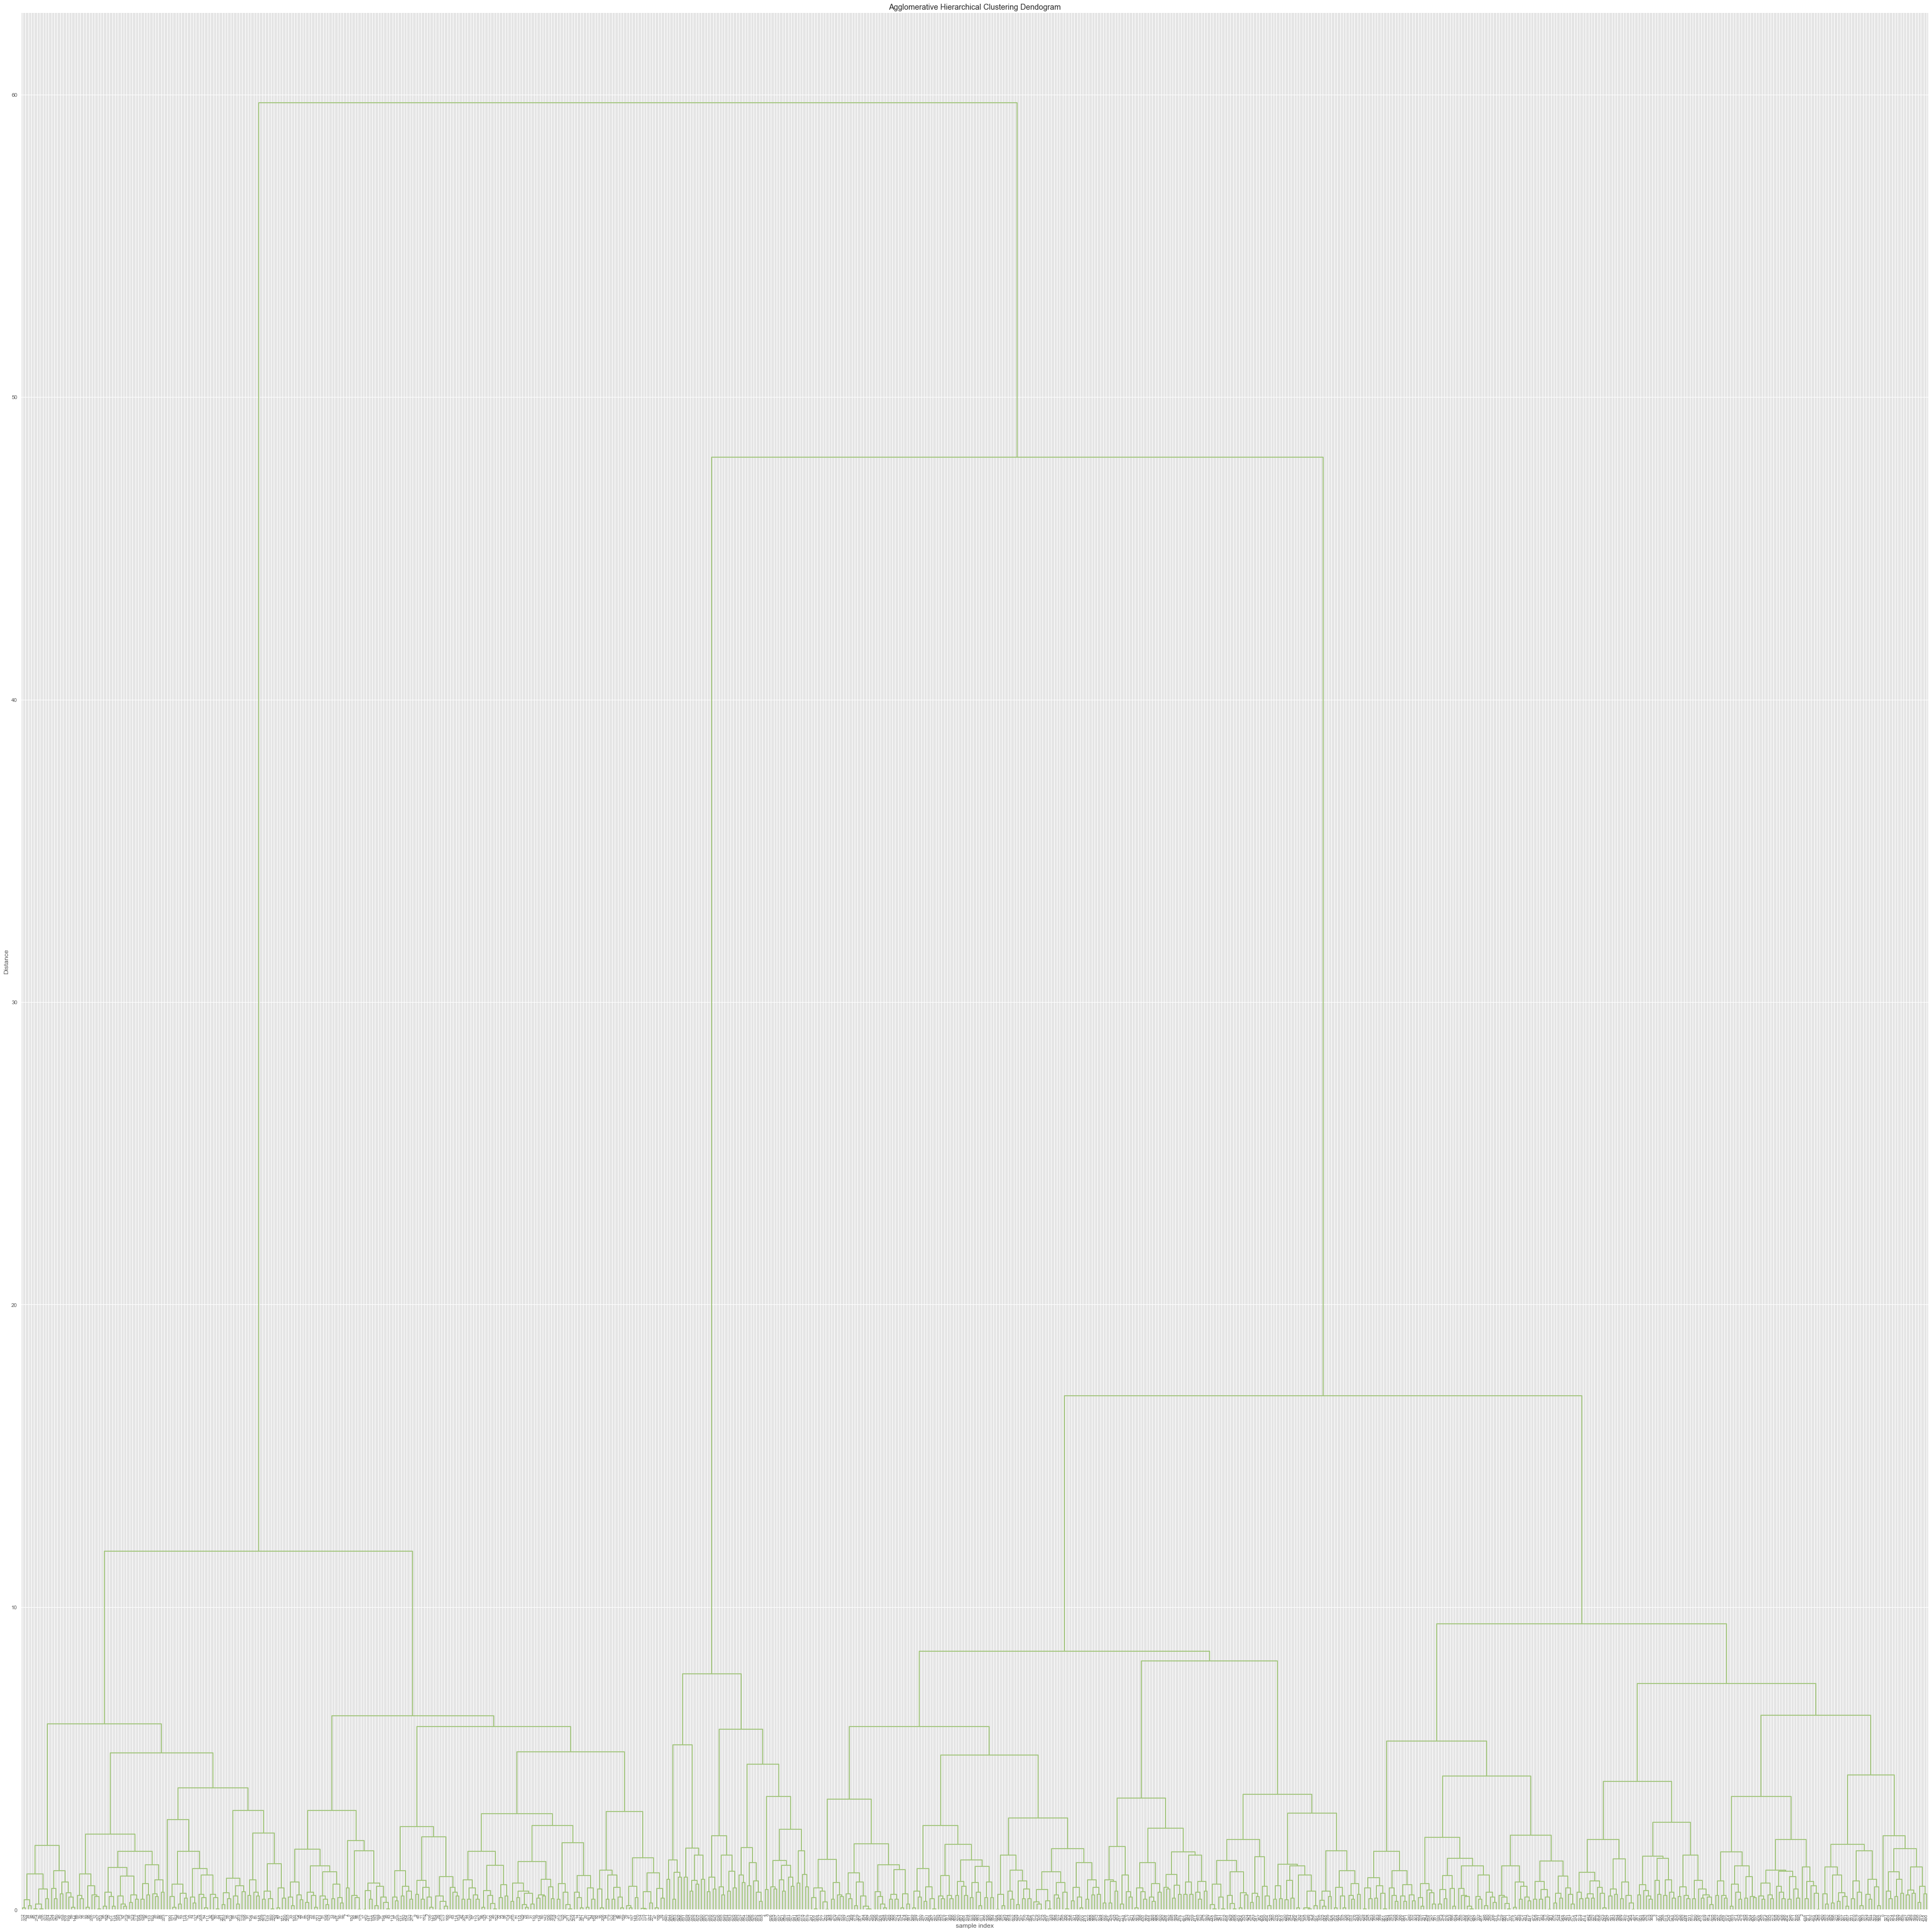

In [24]:
plt.figure(figsize=(50, 50))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 600, leaf_font_size=8. )
plt.tight_layout()

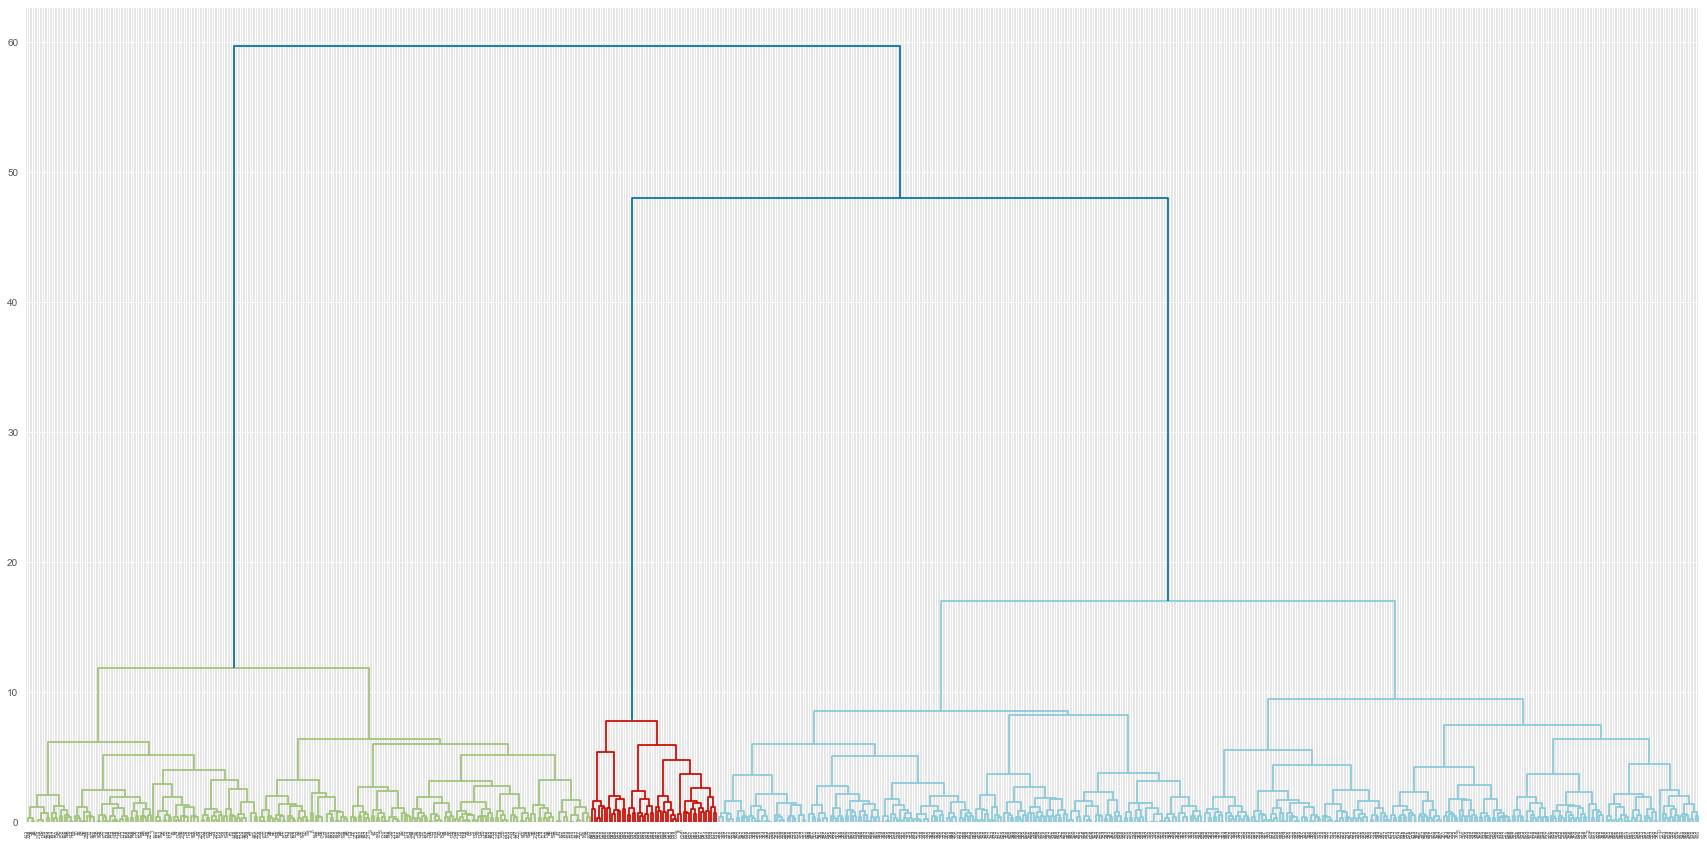

In [25]:
dend = shc.dendrogram(shc.linkage(df_Attr_Scaled, method='ward'))

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

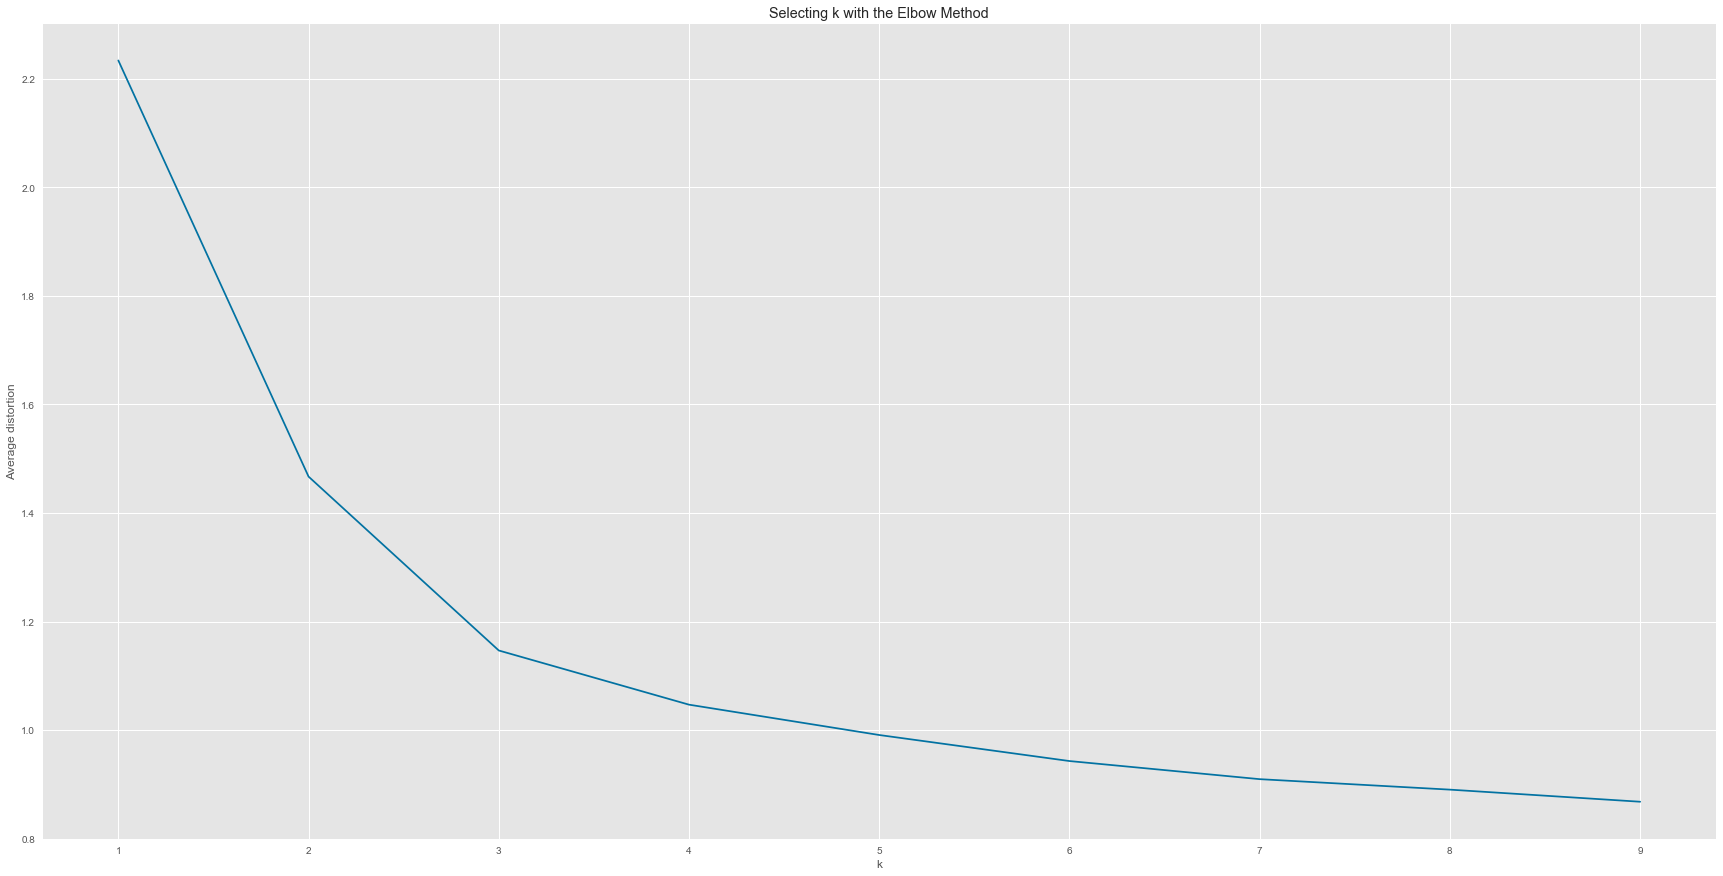

In [26]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_Attr_Scaled)
    prediction=model.predict(df_Attr_Scaled)
    meanDistortions.append(sum(np.min(cdist(df_Attr_Scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_Attr_Scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

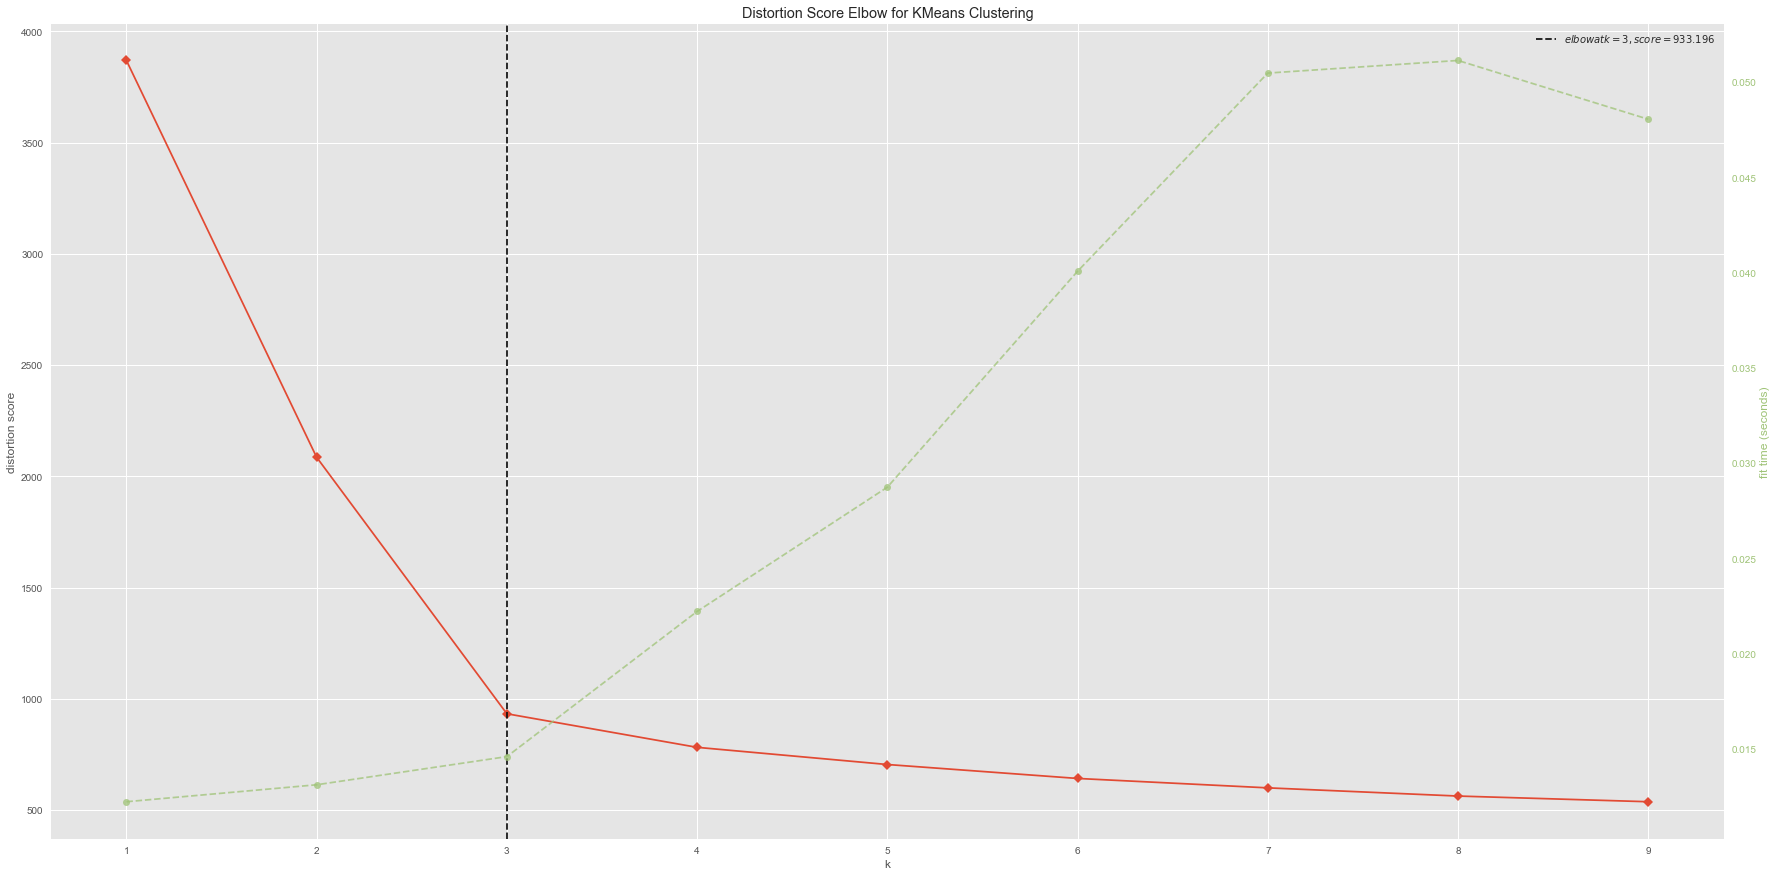

In [27]:
#Finding optimal no. of clusters with elbow method
visualizer = KElbowVisualizer(KMeans(), k=(1,10), timings = True, locate_elbow = True)
visualizer.fit(df_Attr_Scaled) 
visualizer.show() 

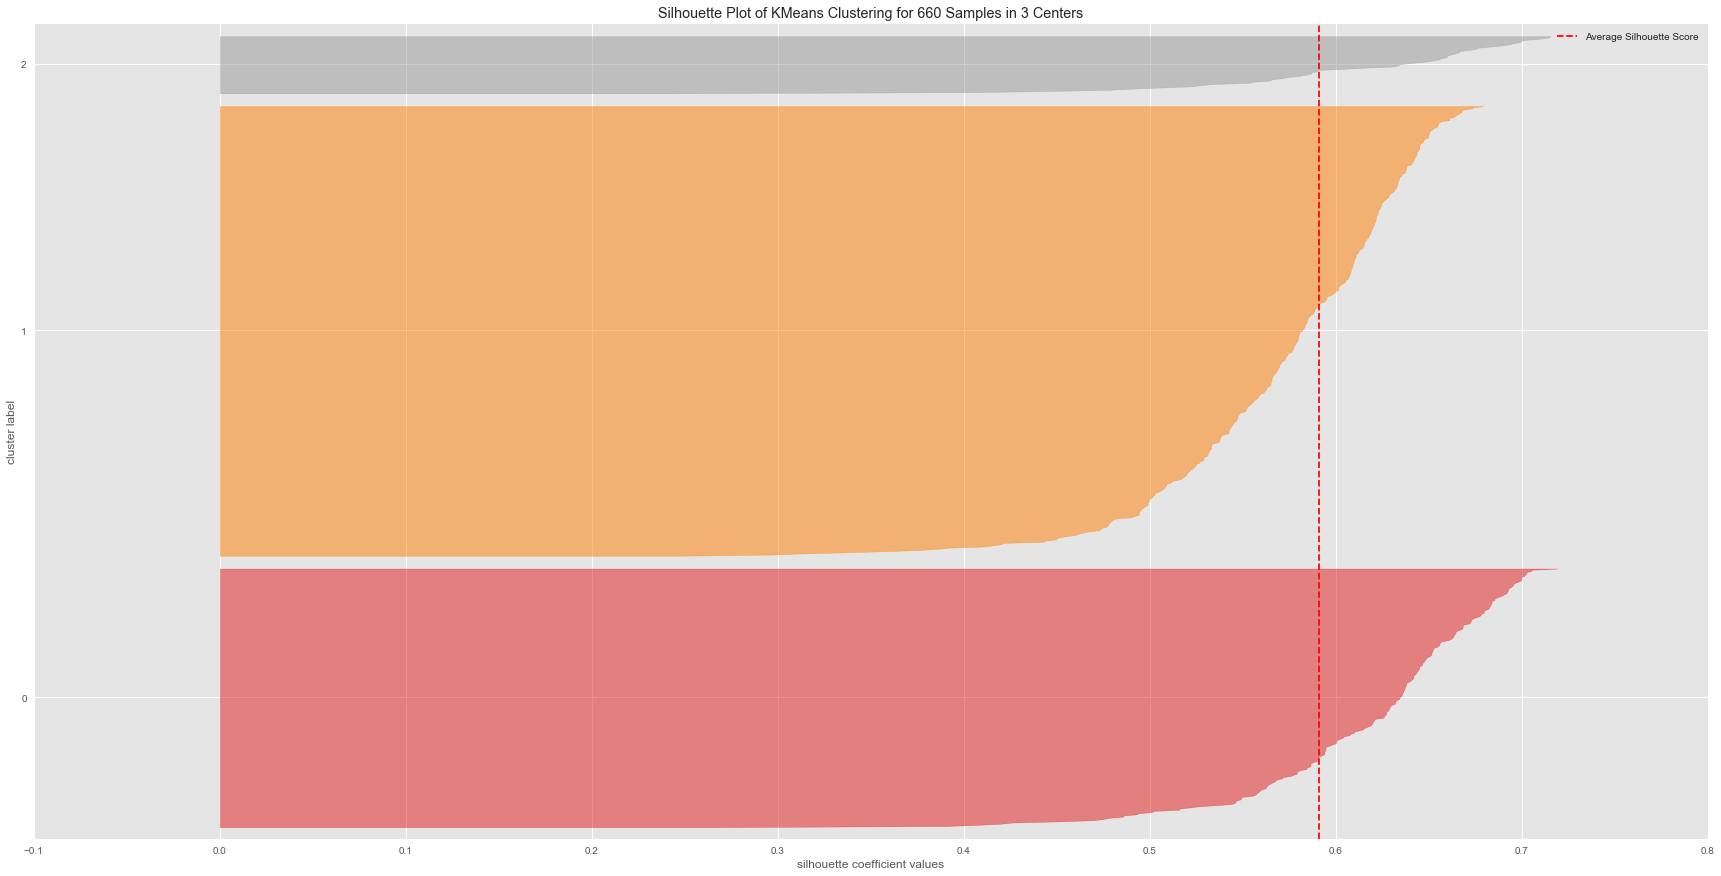

In [28]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(df_Attr_Scaled)    
visualizer.show()

In [29]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, random_state = 1)
kmeans.fit(df_Attr_Scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [30]:
#Clculate the centroids for the columns to profile
centroids = kmeans.cluster_centers_

In [31]:
centroid_df = pd.DataFrame(centroids, columns = list(df_Attr_Scaled))
centroid_df

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            -0.595              -1.063             -0.904   
1            -0.023               0.372              0.664   
2             2.832               1.862             -1.106   

   Total_visits_online  Total_calls_made  labels  
0                0.325             1.153   2.000  
1               -0.553            -0.551   0.000  
2                2.827            -0.874   1.000

In [32]:
df_Attr_Scaled.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0             1.740              -1.249             -0.860   
1             0.410              -0.788             -1.474   
2             0.410               1.059             -0.860   
3            -0.122               0.136             -0.860   
4             1.740               0.597             -1.474   

   Total_visits_online  Total_calls_made  labels  
0               -0.547            -1.252       0  
1                2.521             1.892       2  
2                0.134             0.146       0  
3               -0.547             0.146       0  
4                3.202            -0.204       1

In [33]:
df_Attr_Scaled['cluster'] = kmeans.labels_
df_Attr_Scaled['cluster'] = df_Attr_Scaled['cluster'].astype('str')

In [34]:
df_Attr_Scaled['cluster'].value_counts() 

1    387
0    223
2     50
Name: cluster, dtype: int64

In [35]:
df_Attr_Scaled.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0             1.740              -1.249             -0.860   
1             0.410              -0.788             -1.474   
2             0.410               1.059             -0.860   
3            -0.122               0.136             -0.860   
4             1.740               0.597             -1.474   

   Total_visits_online  Total_calls_made  labels cluster  
0               -0.547            -1.252       0       1  
1                2.521             1.892       2       0  
2                0.134             0.146       0       1  
3               -0.547             0.146       0       1  
4                3.202            -0.204       1       2

In [36]:
# Create a 3d scatter with clusters
fig = px.scatter_3d(df_Attr_Scaled,
                    x = 'Total_visits_bank', 
                    y = 'Total_visits_online', 
                    z = 'Total_calls_made',
                    color = 'cluster',
                    symbol = 'cluster',
                    opacity = 0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=20))
fig.show()

In [58]:
# Alternative way to visualize clusters
df_Attr_Scaled['cluster'] = df_Attr_Scaled['cluster'].astype('int')

fig = px.parallel_coordinates(df_Attr_Scaled[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank','Total_visits_online', 'Total_calls_made','cluster']], color = 'cluster',
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=1)
fig.show()